Backtest

In [87]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf


df = yf.download('BTC-USD', start = "2025-01-25", end = "2025-01-26", interval="5m")
df.columns = df.columns.droplevel(1)

[*********************100%***********************]  1 of 1 completed


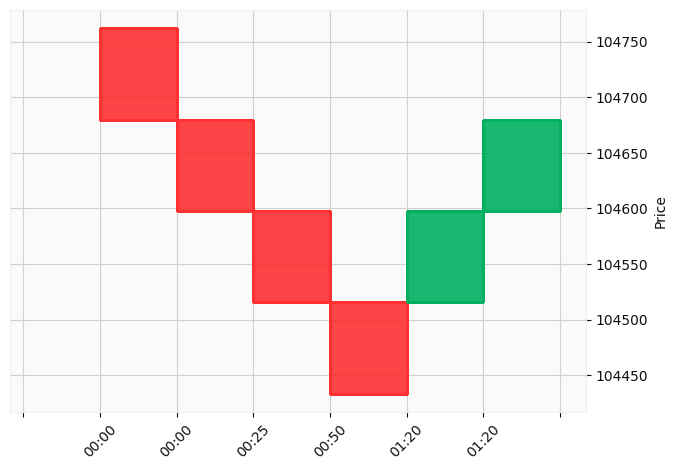

In [88]:
df = df.head(21)
renko_data = mpf.make_addplot(df)
mpf.plot(df, type='renko', style='yahoo')